In [1]:
import pandas as pd
# Load the dataset
dataset_path = "/kaggle/input/water-potability/water_potability.csv"
data = pd.read_csv(dataset_path)
data

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [2]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
from sklearn.ensemble import RandomForestClassifier

RF_model_before_aug = RandomForestClassifier()

# print("===============================================================================")

RF_model_after_aug = RandomForestClassifier()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

data.fillna(data.median(), inplace=True)  # Handle missing values

X = data.drop(columns='Potability')  # Assuming 'label' is the target column
y = data['Potability']

# Check class distribution before split & SMOTE
print("Class distribution before split & SMOTE:")
print(y.value_counts())

Class distribution before split & SMOTE:
Potability
0    1998
1    1278
Name: count, dtype: int64


In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check class distribution after split before SMOTE
print("Class distribution after split before SMOTE:")
print(y_train.value_counts())

Class distribution after split before SMOTE:
Potability
0    1586
1    1034
Name: count, dtype: int64


In [7]:
RF_model_before_aug.fit(X_train, y_train)

RF_pred = RF_model_before_aug.predict(X_test)
print("Random Forest before SMOTE Classification Report:\n\n", classification_report(y_test, RF_pred))
print("Random Forest before SMOTE Accuracy Score:", accuracy_score(y_test, RF_pred))

Random Forest before SMOTE Classification Report:

               precision    recall  f1-score   support

           0       0.69      0.87      0.77       412
           1       0.61      0.34      0.44       244

    accuracy                           0.67       656
   macro avg       0.65      0.61      0.60       656
weighted avg       0.66      0.67      0.65       656

Random Forest before SMOTE Accuracy Score: 0.6737804878048781


In [8]:
# Resample data to handle class imbalance using SMOTE
smote = SMOTE()
X_aug, y_aug = smote.fit_resample(X, y)

# Check class distribution after SMOTE before split
print("Class distribution after SMOTE before split:")
print(y_aug.value_counts())

print("===============================================================================")

X_aug_train, X_aug_test, y_aug_train, y_aug_test = train_test_split(X_aug, y_aug, test_size=0.2, random_state=42)

# Check class distribution after SMOTE & Split
print("Class distribution after SMOTE & Split:")
print(y_aug_train.value_counts())

Class distribution after SMOTE before split:
Potability
0    1998
1    1998
Name: count, dtype: int64
Class distribution after SMOTE & Split:
Potability
0    1604
1    1592
Name: count, dtype: int64


In [9]:
RF_model_after_aug.fit(X_aug_train, y_aug_train)

RF_pred = RF_model_after_aug.predict(X_aug_test)
print("Random Forest after SMOTE & split Classification Report:\n\n", classification_report(y_aug_test, RF_pred))
print("Random Forest after SMOTE & split Accuracy Score:", accuracy_score(y_aug_test,RF_pred))

Random Forest after SMOTE & split Classification Report:

               precision    recall  f1-score   support

           0       0.69      0.71      0.70       394
           1       0.71      0.69      0.70       406

    accuracy                           0.70       800
   macro avg       0.70      0.70      0.70       800
weighted avg       0.70      0.70      0.70       800

Random Forest after SMOTE & split Accuracy Score: 0.7025


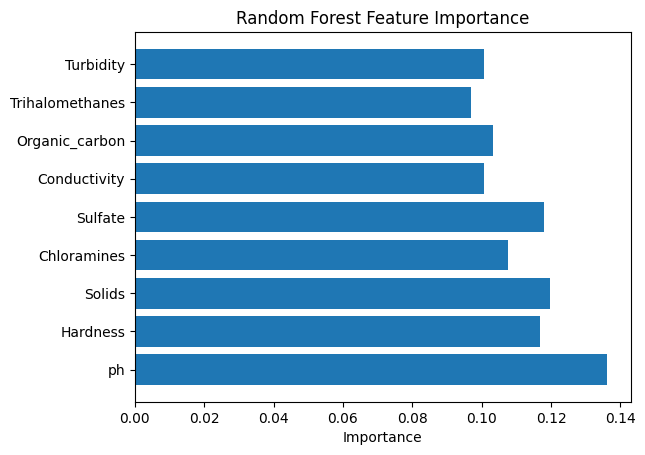

In [10]:
import matplotlib.pyplot as plt
importances = RF_model_after_aug.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()